### Akhmetov Daniyar lab 1


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
#from sklearn import linear_model
#from sklearn.cluster import KMeans
#from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
#from sklearn.utils.multiclass import unique_labels
# import dtale

#from sklearn.linear_model import LogisticRegression
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### №1 Загрузить таблицу Iris из репозитория UCI. Поместить данные в объект DataFrame. Вычислить корреляции между признаками на всей таблице и отдельно по классам. Визуализировать распределения классов на всех парах параметров.


### Explore data

In [3]:
# Загружаем набор данных Ирисы:
iris = datasets.load_iris()
# Смотрим на названия переменных
print(iris.feature_names)
# Смотрим на данные, выводим 10 первых строк: 
print(iris.data[:10])
# Смотрим на целевую переменную:
print(iris.target_names)
print(iris.target[:10])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0]


### Качество выборки для различных классов и различных переменных

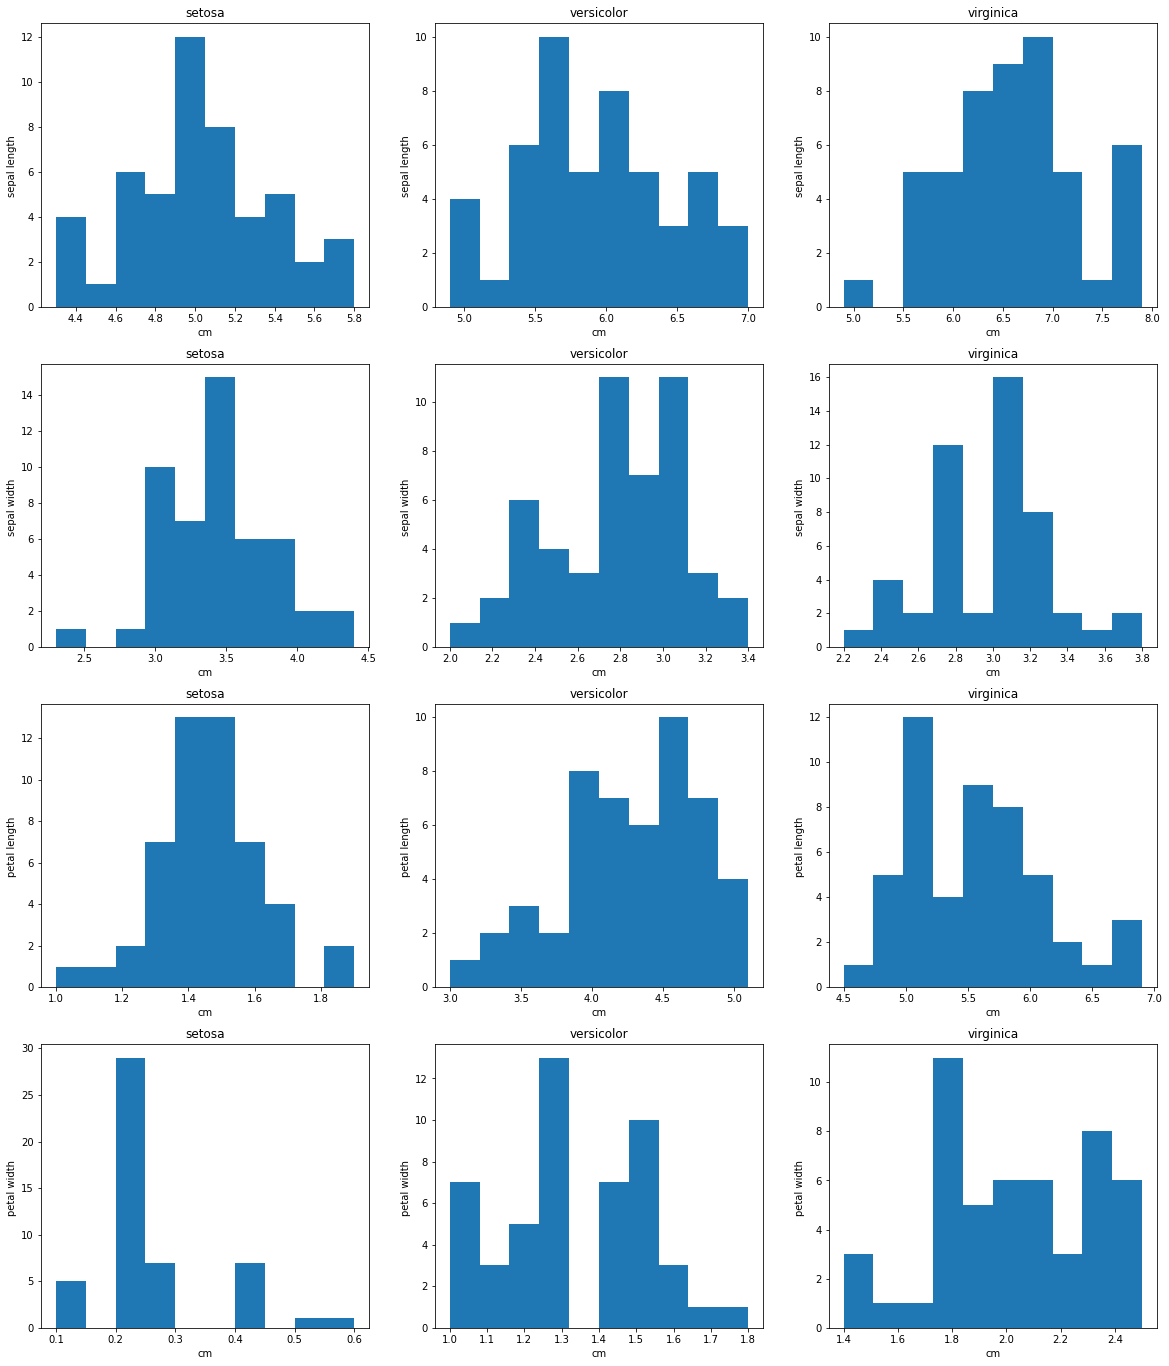

In [5]:
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

### Разделимость классов по различным переменным

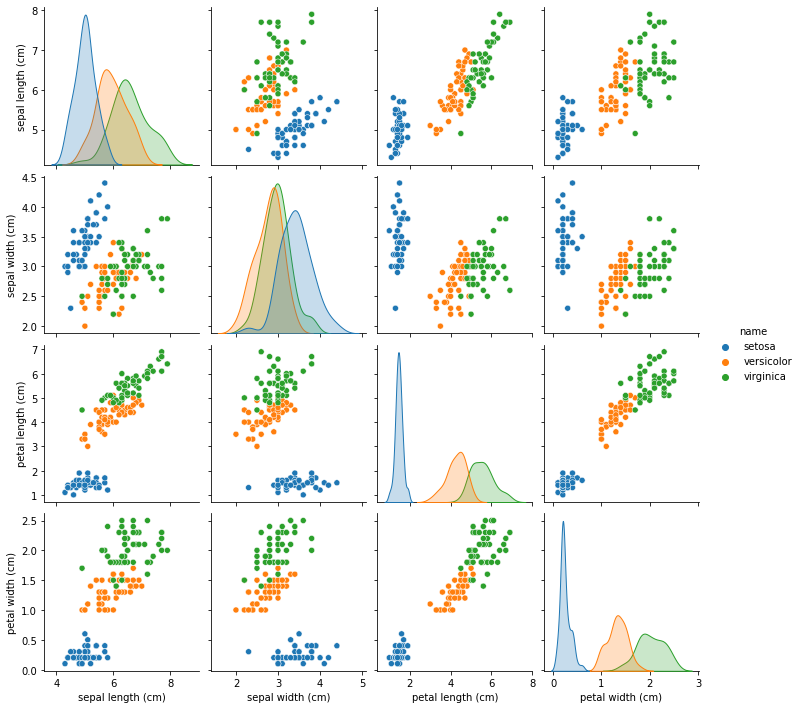

In [6]:
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

### Матрица корреляции по всем классам 

In [7]:
iris_frame.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

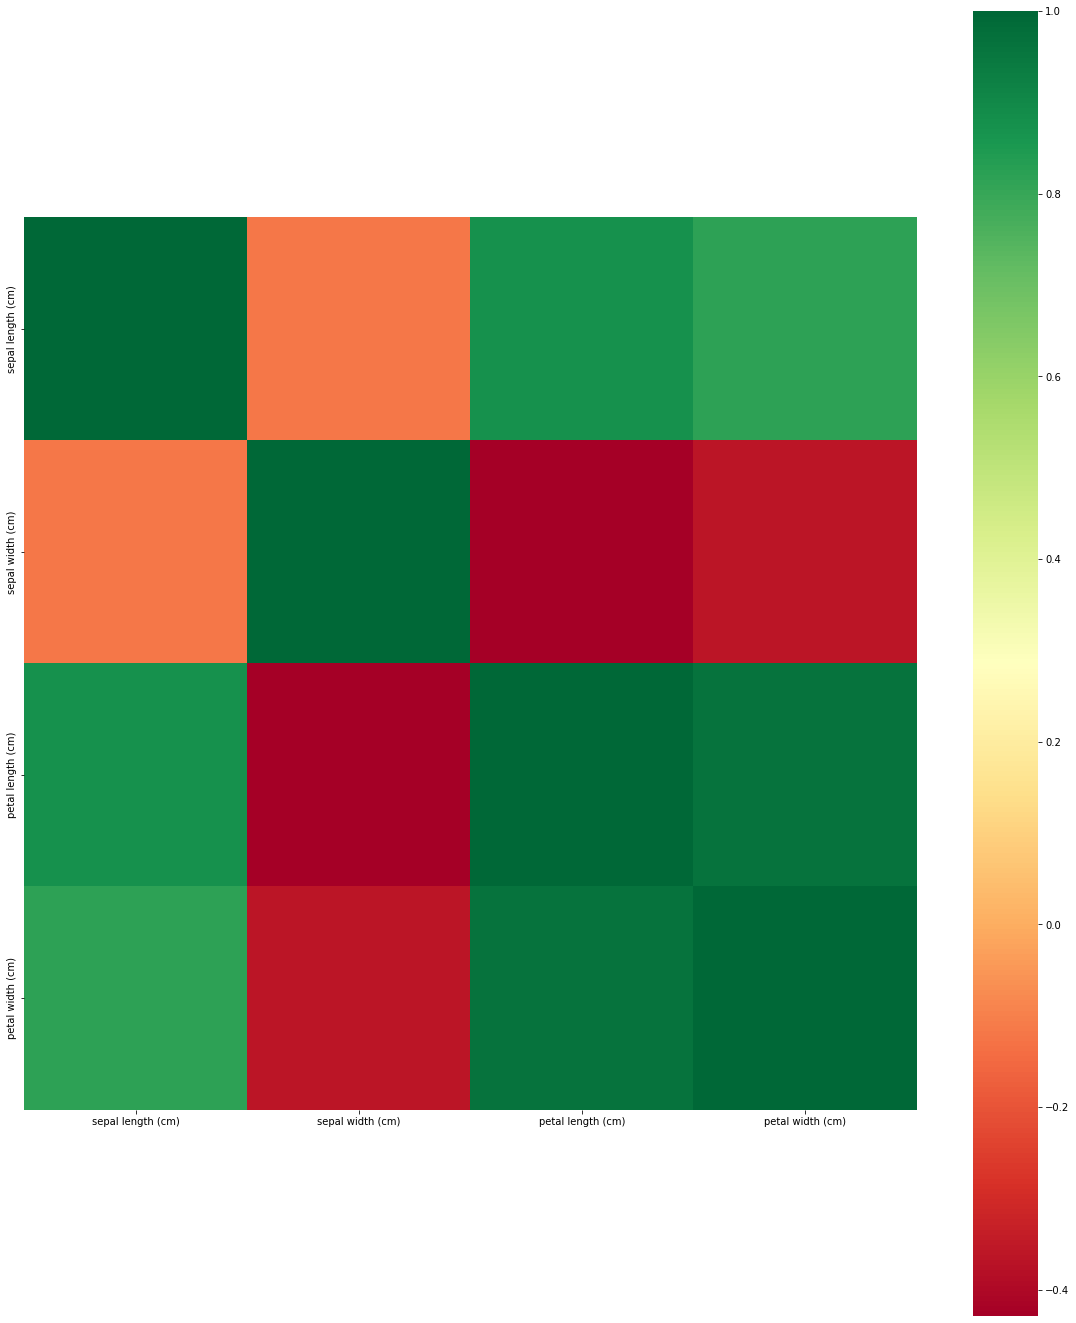

In [28]:
sns.heatmap(iris_frame.iloc[:,:4].corr(), square=True, cmap='RdYlGn')

### Матрица корреляции по классам в отдельности

In [8]:
iris_frame.drop(columns = 'target').groupby(['name']).corr()

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

### №2 Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами:


### Prepare X and y

In [9]:
par1 = 0; par2 = 1

In [12]:
df_1 = iris_frame[iris_frame['name'] != 'setosa'][[iris.feature_names[par1], iris.feature_names[par2], 'target', 'name']]
df = iris_frame[[iris.feature_names[par1], iris.feature_names[par2], 'target', 'name']]
X = df[[iris.feature_names[par1], iris.feature_names[par2]]].to_numpy()
X_study = iris_frame[iris_frame['name'] != 'setosa'].iloc[:,:4].to_numpy()
y = df['target'].to_numpy()
X_1 = df_1[[iris.feature_names[par1], iris.feature_names[par2]]].to_numpy()
y_1 = df_1['target'].to_numpy()

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### Logistic regression

No handles with labels found to put in legend.


25


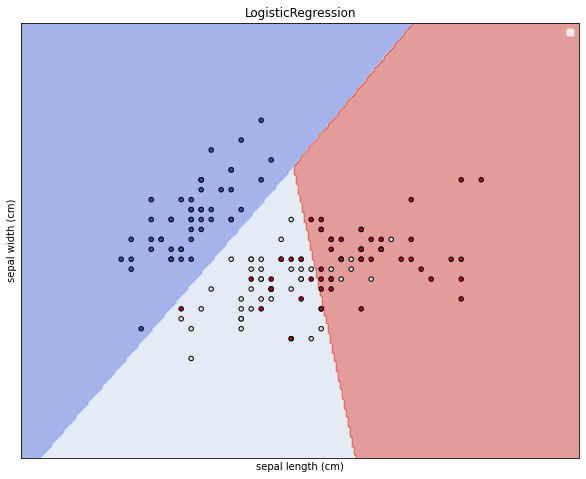

In [19]:
model = LR(C=1e5, solver='lbfgs', multi_class='multinomial')
clf = model.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
title = ('LogisticRegression')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[par2])
ax.set_xlabel(iris.feature_names[par1])
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()


Y_pred = clf.predict(X)
res = np.count_nonzero(Y_pred-y)
print(res)

### SVM (linear)

No handles with labels found to put in legend.


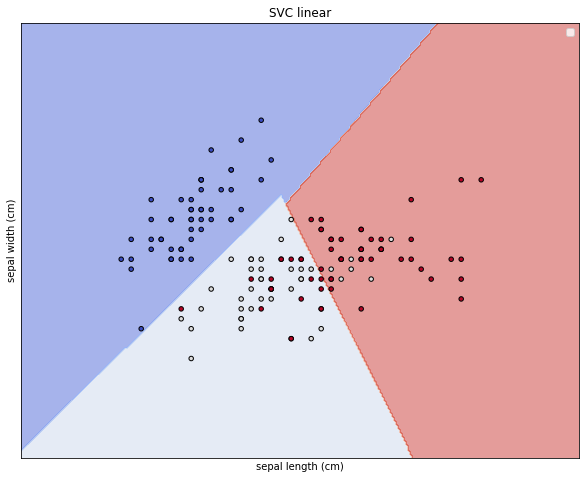

27


In [21]:
model = SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
title = ('SVC linear')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[par2])
ax.set_xlabel(iris.feature_names[par1])
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Y_pred = clf.predict(X)
res = np.count_nonzero(Y_pred-y)
print(res)

### SVM (poly)

No handles with labels found to put in legend.


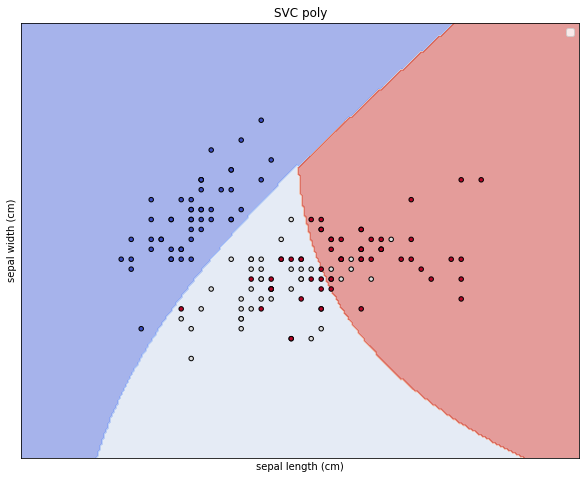

28


In [22]:
model = SVC(kernel='poly')
clf = model.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
title = ('SVC poly')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[par2])
ax.set_xlabel(iris.feature_names[par1])
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Y_pred = clf.predict(X)
res = np.count_nonzero(Y_pred-y)
print(res)

### Linear discriminant

No handles with labels found to put in legend.


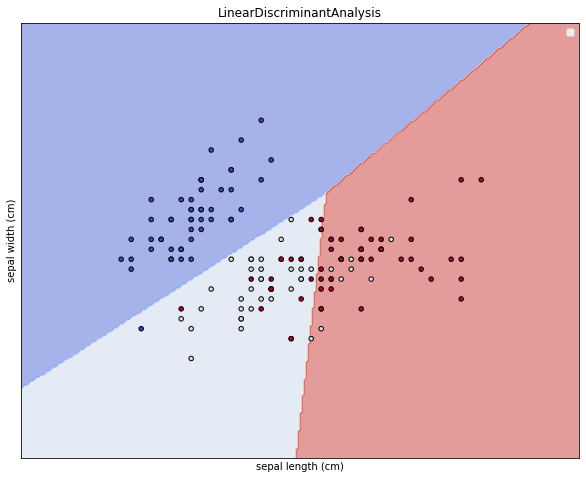

30


In [23]:
model = LDA()
clf = model.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
title = ('LinearDiscriminantAnalysis')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[par2])
ax.set_xlabel(iris.feature_names[par1])
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Y_pred = clf.predict(X)
res = np.count_nonzero(Y_pred-y)
print(res)

### Quadratic descriminant

No handles with labels found to put in legend.


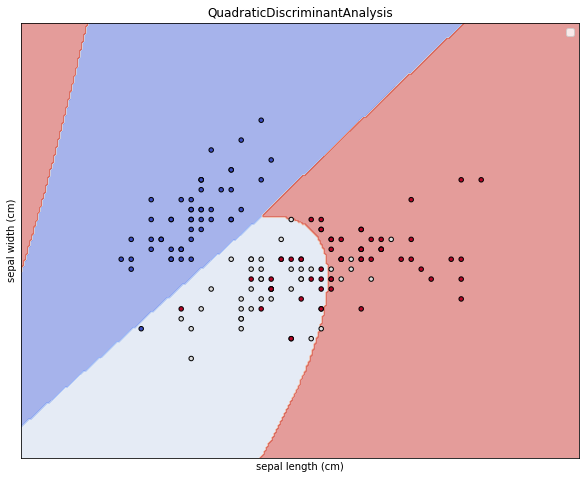

30


In [24]:
model = QDA()
clf = model.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 8))
title = ('QuadraticDiscriminantAnalysis')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[par2])
ax.set_xlabel(iris.feature_names[par1])
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Y_pred = clf.predict(X)
res = np.count_nonzero(Y_pred-y)
print(res)

### №3 Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.

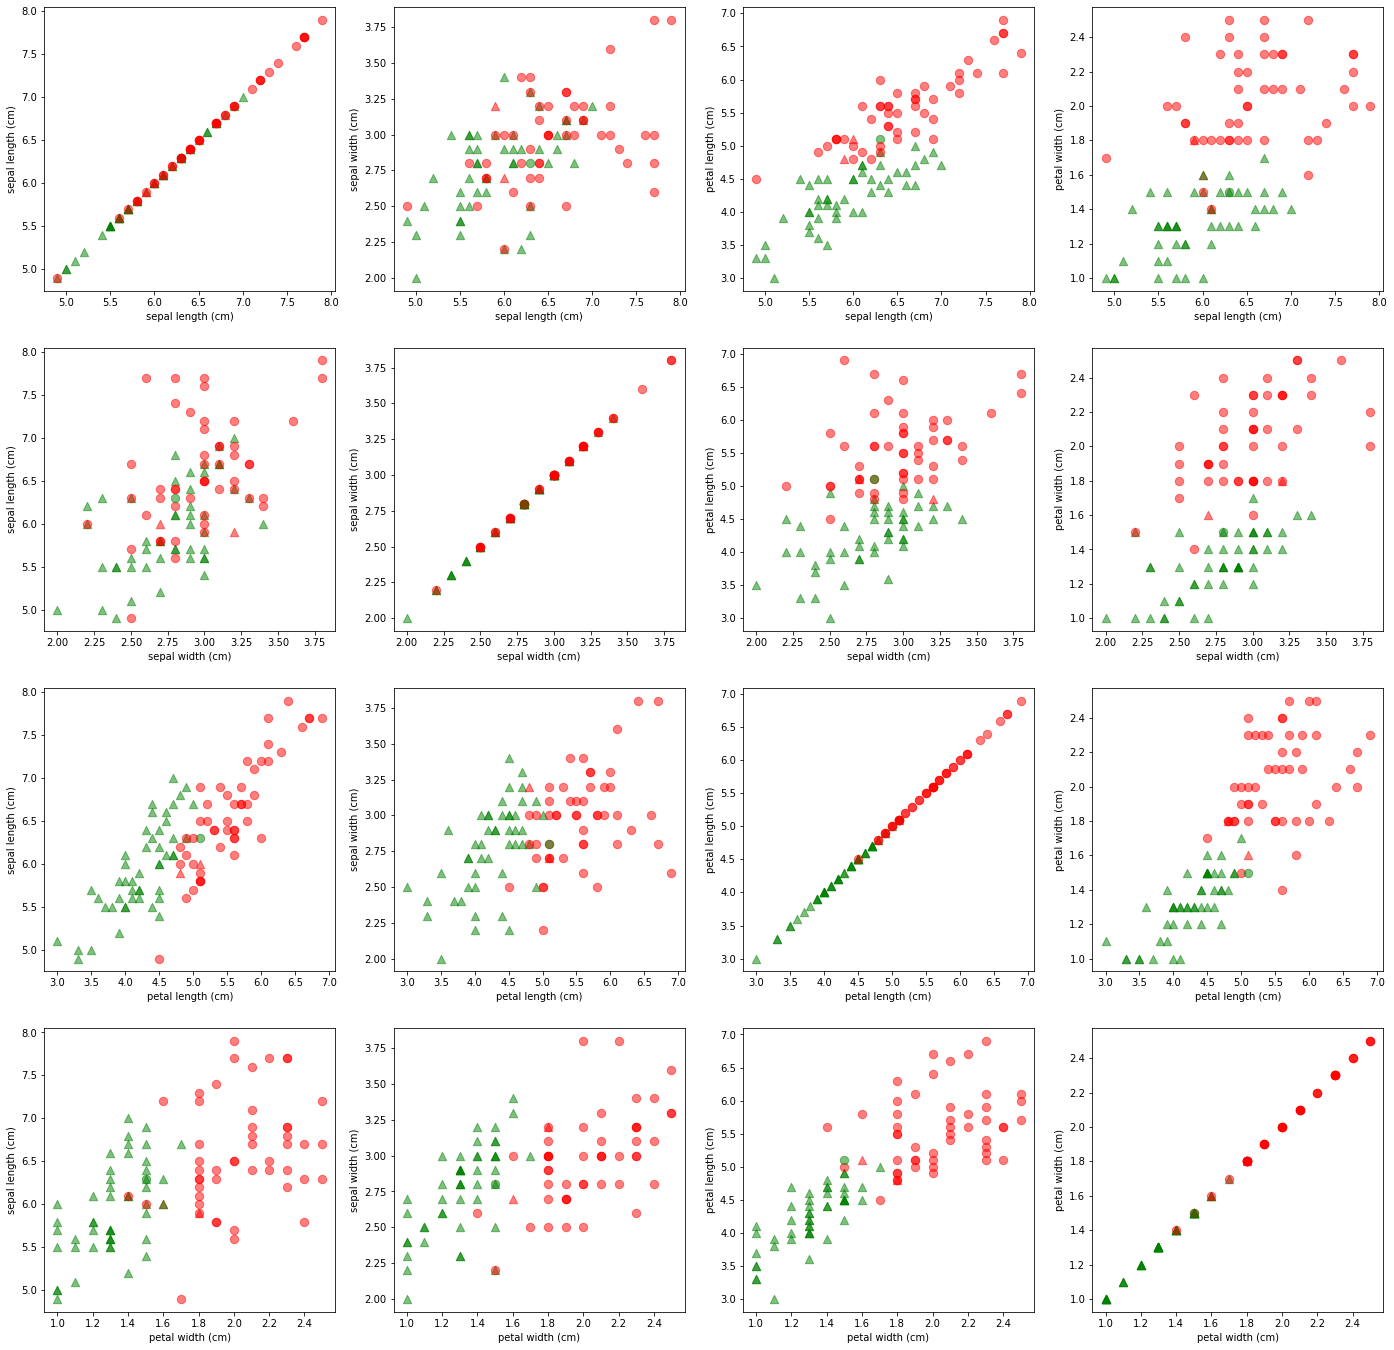

In [25]:
fig, axs = plt.subplots(4, 4, figsize=(24, 24))
Markers = {1: '^', 2: 'o'}
Colors = {1: 'green', 2: 'red'}
model_local = LDA()
clf_local = model_local.fit(X_study, y_1)
Answer_local = clf_local.predict(X_study)
for i in range(4):
    for j in range(4):
        axs[i, j].set_ylabel(iris.feature_names[j])
        axs[i, j].set_xlabel(iris.feature_names[i])
        df_local = iris_frame[iris_frame['name'] != 'setosa'][[iris.feature_names[i], iris.feature_names[j], 'target', 'name']]
        X_local = df_local.iloc[:,:2].to_numpy()
        y_local = df_local['target'].to_numpy()
        for k in range(len(X_local)):
            axs[i, j].scatter(X_local[k, 0], X_local[k, 1], marker = Markers[y_local[k]], c = Colors[Answer_local[k]], s = 70, alpha = 0.5)

### №4 На двух переменных из п.2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.

In [20]:
sign = lambda x: math.copysign(1, x)


class Q_D:
    
    def __init__(self):
        self.mu = 0
        self.nu = 0
        self.Sigma = 0
        self.Lambda = 0
        
    
    def fit(self,X,Y):
        self.mu = np.mean(X[:50,:],axis=0)
        self.nu = np.mean(X[50:100,:],axis=0)

        self.Sigma = np.cov(X[0:50,:].T)
        self.Lambda = np.cov(X[50:100,:].T) 
    
    def predict_local(self,x):
        Q1 = np.dot((x-self.mu).T, LA.inv(self.Sigma)).dot(x-self.mu)
        Q2 = np.dot((x-self.nu).T, LA.inv(self.Lambda)).dot(x-self.nu)
        res = 1/2*(Q2-Q1) +np.log(sqrt(abs(LA.norm(self.Lambda)/LA.norm(self.Sigma)))) 
        return sign(res);

    def predict(self,X):
        y_answer = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            y_answer[i] = self.predict_local(X[i,:])
        answer = lambda x: x + (x==-1)*3
        Y_answer = answer(y_answer) 
        Y_answer = Y_answer.astype(int)
        return Y_answer;


In [33]:
model = Q_D()
model.fit(X_1, y_1)
Y_answer = model.predict(X_1)

[2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 2 2
 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1
 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1]


2021-11-26 15:13:03,744 - WARNING  - No handles with labels found to put in legend.


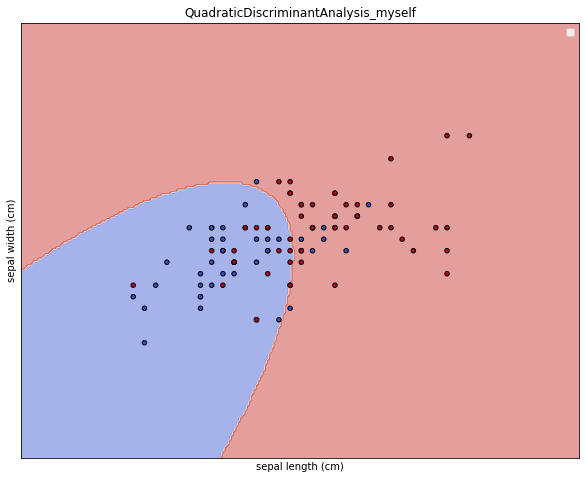

30


In [34]:
model = Q_D()
model.fit(X_1, y_1)
fig, ax = plt.subplots(figsize=(10, 8))
title = ('QuadraticDiscriminantAnalysis_myself')
X0, X1 = X_1[:, 0], X_1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y_1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[par2])
ax.set_xlabel(iris.feature_names[par1])
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Y_pred = model.predict(X_1)
res = np.count_nonzero(Y_pred-y_1)
print(res)

2021-11-26 15:13:27,450 - WARNING  - No handles with labels found to put in legend.


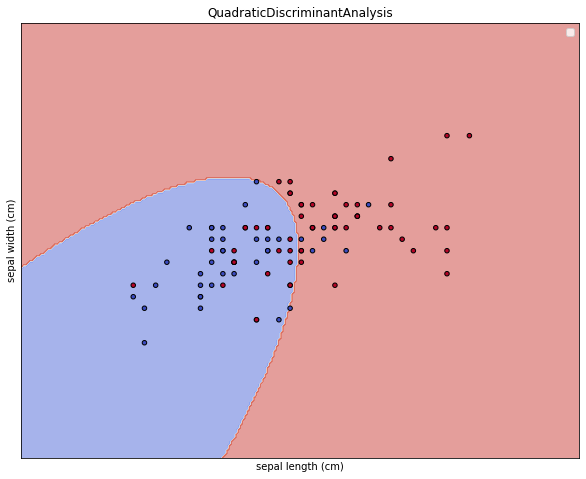

29


In [35]:
model = QDA()
clf = model.fit(X_1, y_1)

fig, ax = plt.subplots(figsize=(10, 8))
title = ('QuadraticDiscriminantAnalysis')
X0, X1 = X_1[:, 0], X_1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(X0, X1, c=y_1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(iris.feature_names[par2])
ax.set_xlabel(iris.feature_names[par1])
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Y_pred = clf.predict(X_1)
res = np.count_nonzero(Y_pred-y_1)
print(res)

### Выводы
#### 1. Классы 1 и 2, 1 и 3 более разделимы чем 2 и 3
#### 2. Использование всех переменных значительно улучшает качество классификации.
#### 3. Для 2 переменных наиболее точны логистическая регрессия и линейный дискрименант